# EDA - Exploratory Data Analysis 

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import palettable.matplotlib as palmpl
from legendgram import legendgram

url='https://bit.ly/3owocdI'  # airbnb data
df = pd.read_csv(url)
df['price'] = df.price.str.replace('$','').astype('float')
gdf= gpd.GeoDataFrame(df,
                        geometry=gpd.points_from_xy(
                            df['longitude'], df['latitude'], crs='epsg:4326'
                        )
                     )
gdf.info()

In [ ]:
pwd

In [ ]:
print(df.price.mean()) 
# the fact that this is much higher than the median indicates the data is highly skewed
print(df.price.median())  
print(df.price.quantile(0.25))

In [ ]:
df['zscore'] = (df.price - df.price.mean())/df.price.std()
df.zscore.describe()

In [ ]:
df.price.plot.box()  # plot.box command appended to the column and dataframe of interest
plt.savefig('../data/w6-geopandas/pboxplot.png', dpi=150, transparent=True)

In [ ]:
df.room_type.value_counts().plot.bar()
plt.savefig('../data/w6-geopandas/phistplot.png', dpi=150, transparent=True)

In [ ]:
df.plot.scatter(x='longitude', y='latitude')
plt.savefig('../data/w6-geopandas/pscatterplot.png', dpi=150, transparent=True)

In [ ]:
df.plot.scatter(x='longitude', y='latitude', 
               c='price', colormap='viridis',
               figsize=(10,5), title='London',
               grid=True,s=24, marker='x')
plt.savefig('../data/w6-geopandas/pscatterplot2.png', dpi=150, transparent=True)

In [ ]:
gdf= gpd.GeoDataFrame(df,   # this is converting the dataframe to a geodataframe using geopandas
                     geometry=gpd.points_from_xy(df['longitude'], df['latitude'], crs='epsg:4326'))
gdf.plot(column='price', cmap='viridis', scheme='quantiles', markersize=8, legend=True)

# ESDA video 

In [6]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import libpysal 
import mapclassify as mc


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   NAME        33 non-null     object  
 1   GSS_CODE    33 non-null     object  
 2   HECTARES    33 non-null     float64 
 3   NONLD_AREA  33 non-null     float64 
 4   ONS_INNER   33 non-null     object  
 5   geometry    33 non-null     geometry
dtypes: float64(2), geometry(1), object(3)
memory usage: 1.7+ KB


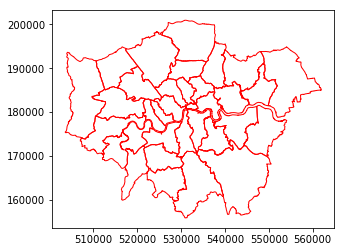

In [11]:
url = 'https://bit.ly/3neINBV'
boros = gpd.read_file(url, driver='GPKG')
boros.plot(color='none', edgecolor='red')

boros.info()

url='https://bit.ly/3owocdI'  # airbnb data
df = pd.read_csv(url)
df['price'] = df.price.str.replace('$','').astype('float')
gdf= gpd.GeoDataFrame(df,
                        geometry=gpd.points_from_xy(
                            df['longitude'], df['latitude'], crs='epsg:4326'
                        )
                     )

In [10]:
url='https://bit.ly/3owocdI'  # airbnb data
df = pd.read_csv(url)
df['price'] = df.price.str.replace('$','').astype('float')
gdf= gpd.GeoDataFrame(df,
                        geometry=gpd.points_from_xy(
                            df['longitude'], df['latitude'], crs='epsg:4326'
                        )
                     )


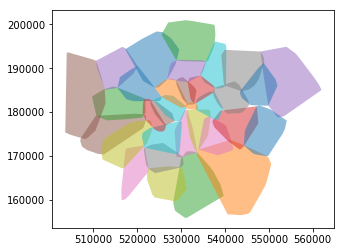

In [13]:
# these commands must rely on a different dataset as vars 'ax' 'price' etc. are not in there
boros['hulls'] = boros.geometry.convex_hull
boros = boros.set_geometry('hulls')
boros.plot( column='NAME', categorical=True, alpha=0.5)

KeyError: 'region'

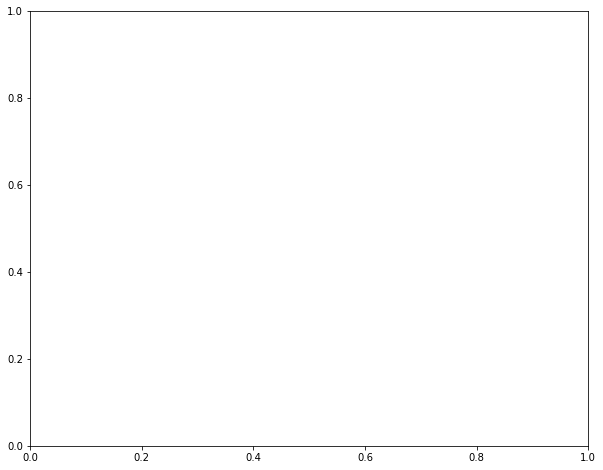

In [15]:
f, ax = plt.subplots(figsize=(10,8))
ldn = boros.dissolve(by='region')
ldn.plot
gdf.plot(column='price', scheme='HeadTailBreaks',cmap='inferno')  
#colouring records by price using headtail breaks and inferno is the color scheme

In [ ]:
ldn.simplify(250).plot()  # 250 returns to 250m threshold - simplifying the number of points 


In [ ]:
ldn.buffer(500).plot()   # applying a 500m buffer 
ldn.buffer(1000).simplify(1000).plot()   # simplify then add a plot 
ldn.buffer(3000).simplify(2500).difference(ldn.geometry).plot(ax=ax)

#legendgrams -- allows attaching distribution as part of the legend 

# KNN - K nearest neighbours - the influences that one listing might have on its neighbours 
from pysal.lib import weights
w=weights.KNN.from_dataframe(gdf, k=3)
gdf['w_price'] = weights.lag_spatial(w,gdf.price)
gdf[['name', 'price', 'w_price']].sample(5, random_state=42)


In [ ]:
# distance band -- 
# Moran's I https://en.wikipedia.org/wiki/Moran%27s_I - a measure of spatial autocorrelation

mi = esda.Moran(gdf['price'], w)
print(f"{mi.I:0.4f}")
print(f"{mi.p_sim:0.4f}")
moran_scatterplot(mi)

# local Moran's I 